In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

Get the data and pre-process it

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

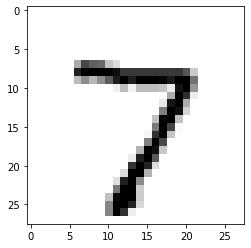

In [4]:
plt.imshow(X_test[0], cmap="binary")

In [5]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap="binary")
    plt.title(y_train[i])
    plt.show()

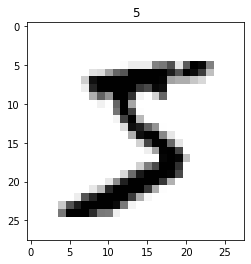

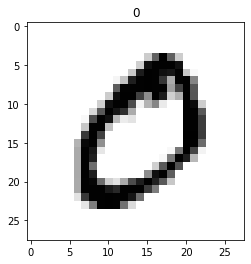

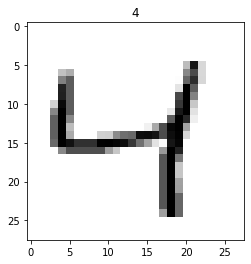

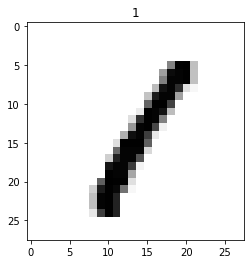

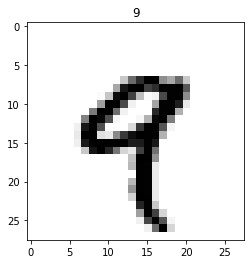

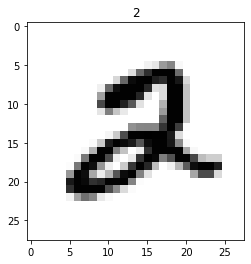

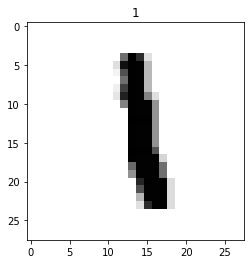

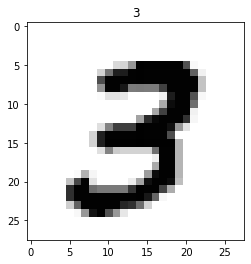

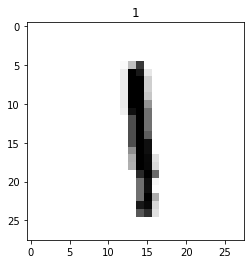

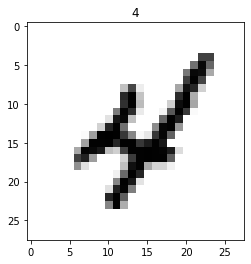

In [6]:
for i in range(10):
    plot_input_img(i)

In [7]:
# Pre process the images
# Normalizing the image to [0, 1] range
X_train = X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255


# Reshape/expand the dimensions of images to (28, 28, 1)
X_train=np.expand_dims(X_train, -1)
X_test=np.expand_dims(X_test, -1)

# Convert classes to one hot vectors
y_train=keras.utils.np_utils.to_categorical(y_train)
y_test=keras.utils.np_utils.to_categorical(y_test)


In [8]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dropout (Dropout)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                92170     
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
__________________________________________________

In [10]:
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [11]:
# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping
es=EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)

# Model CheckPoint
mc=ModelCheckpoint("./bestmodel.h5", monitor="val_acc", verbose=1, save_best_only=True)

cb=[es, mc]

Model Training 

In [12]:
his=model.fit(X_train, y_train, epochs=50, validation_split=0.3)

Epoch 1/50
1313/1313 [==============================] - 61s 46ms/step - loss: 0.1697 - accuracy: 0.9484 - val_loss: 0.0670 - val_accuracy: 0.9786
Epoch 2/50
1313/1313 [==============================] - 63s 48ms/step - loss: 0.0615 - accuracy: 0.9812 - val_loss: 0.0595 - val_accuracy: 0.9823
Epoch 3/50
1313/1313 [==============================] - 65s 50ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0514 - val_accuracy: 0.9842
Epoch 4/50
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0319 - accuracy: 0.9897 - val_loss: 0.0552 - val_accuracy: 0.9833
Epoch 5/50
1313/1313 [==============================] - 66s 50ms/step - loss: 0.0267 - accuracy: 0.9912 - val_loss: 0.0623 - val_accuracy: 0.9836
Epoch 6/50
1313/1313 [==============================] - 70s 54ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0571 - val_accuracy: 0.9849
Epoch 7/50
1313/1313 [==============================] - 73s 55ms/step - loss: 0.0183 - accuracy: 0.9938 - val_loss: 0.0566 -

In [19]:
model.save_weights("best_model.h5")
model.load_weights("best_model.h5")
model.save("C://Users//Dell//OneDrive//Desktop//Mini Project//best_model.h5")
model_S = keras.models.load_model("C://Users//Dell//OneDrive//Desktop//Mini Project//best_model.h5")

In [22]:
score=model_S.evaluate(X_test, y_test)
print(f"The Model Accuracy is: {score[1]}")

313/313 [==============================] - 3s 9ms/step - loss: 0.0845 - accuracy: 0.9897
The Model Accuracy is: 0.9897000193595886
